In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('/content/drive/MyDrive/TutorialDataset/iris_dataset.csv')

In [21]:
# Import required libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import label_binarize
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, roc_auc_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
# 2. Encode labels if needed (assume target column is 'species')
label_encoder = LabelEncoder()
df['species'] = label_encoder.fit_transform(df['species'])

In [7]:
# 3. Feature and target split
X = df.drop('species', axis=1)
y = df['species']

In [8]:
# 4. Binarize target for ROC-AUC (multi-class)
y_bin = label_binarize(y, classes=[0, 1, 2])

In [9]:
# 5. Train-test split
X_train, X_test, y_train, y_test, y_train_bin, y_test_bin = train_test_split(
    X, y, y_bin, test_size=0.3, random_state=42, stratify=y)

In [10]:
# 6. Standardize features (important for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
# Models
models = {
    'SVM': SVC(kernel='linear', probability=True),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

In [22]:
# Evaluation function
def evaluate_model(name, model, X_train, X_test, y_train, y_test, y_test_bin):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)

    print(f"\n--- {name} Evaluation ---")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision (macro):", precision_score(y_test, y_pred, average='macro'))
    print("Recall (macro):", recall_score(y_test, y_pred, average='macro'))
    print("F1 Score (macro):", f1_score(y_test, y_pred, average='macro'))

    # ROC-AUC (multiclass)
    roc_auc = roc_auc_score(y_test_bin, y_prob, multi_class='ovr')
    print("ROC-AUC Score:", roc_auc)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
                xticklabels=label_encoder.classes_,
                yticklabels=label_encoder.classes_)
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


--- SVM Evaluation ---
Accuracy: 0.9111111111111111
Precision (macro): 0.9155354449472096
Recall (macro): 0.9111111111111111
F1 Score (macro): 0.9107142857142857
ROC-AUC Score: 0.9955555555555556


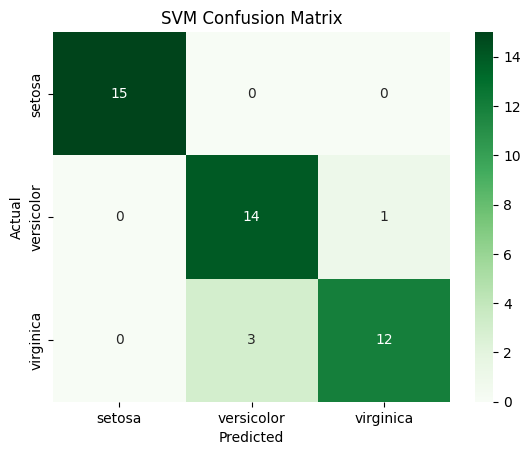

In [23]:
# Evaluate SVM model
evaluate_model("SVM", models['SVM'], X_train_scaled, X_test_scaled, y_train, y_test, y_test_bin)


--- Decision Tree Evaluation ---
Accuracy: 0.9333333333333333
Precision (macro): 0.9444444444444445
Recall (macro): 0.9333333333333332
F1 Score (macro): 0.9326599326599326
ROC-AUC Score: 0.9500000000000001


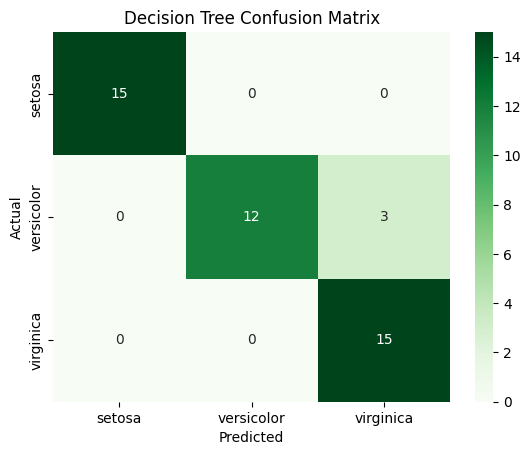

In [25]:
# Evaluate Decision Tree model
evaluate_model("Decision Tree", models['Decision Tree'], X_train, X_test, y_train, y_test, y_test_bin)